<a href="https://colab.research.google.com/github/Rubenmarbez/Proyecto-HomeFinder/blob/main/Masterclass_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cargar y dividir el dataset CIFAR-10
(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()

# Normalizar los valores de píxeles al rango [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 18s 0us/step


In [ ]:
len(train_labels)

50000

In [ ]:
train_labels[0]

array([6], dtype=uint8)

In [ ]:
# Definir la arquitectura de la red neuronal convolucional
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # El 32 es el número de filtros que vamos a tener
    # El (3, 3) es el tamaño del filtro que vamos a ir pasando por la imagen
    # La función "relu" es para añadirle NO LINEALIDAD
    # (32, 32, 3) es el tamaño de las imágenes y el canal RGB
    layers.MaxPooling2D((2, 2)), # Con esto quitamos calidad a la imagen
    # Comprimiendo la información para hacer más simple el modelo
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # Se ponen 10 neuronas porque el dataset utilizado...
    # Tiene 10 clases "CIFAR-10"
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 1.5067 - accuracy: 0.4493
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1396 - accuracy: 0.5949
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9914 - accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8875 - accuracy: 0.6896
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8183 - accuracy: 0.7135
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7591 - accuracy: 0.7340
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7131 - accuracy: 0.7491
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6686 - accuracy: 0.7655
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6268 - accuracy: 0.7812
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.

In [ ]:
# Evaluar la precisión del modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Exactitud del modelo: {test_acc:.2f}')
print(f'Pérdida del modelo: {test_loss:.2f}')

313/313 [==============================] - 2s 5ms/step - loss: 0.8715 - accuracy: 0.7073
Exactitud del modelo: 0.71
Pérdida del modelo: 0.87


313/313 [==============================] - 1s 2ms/step


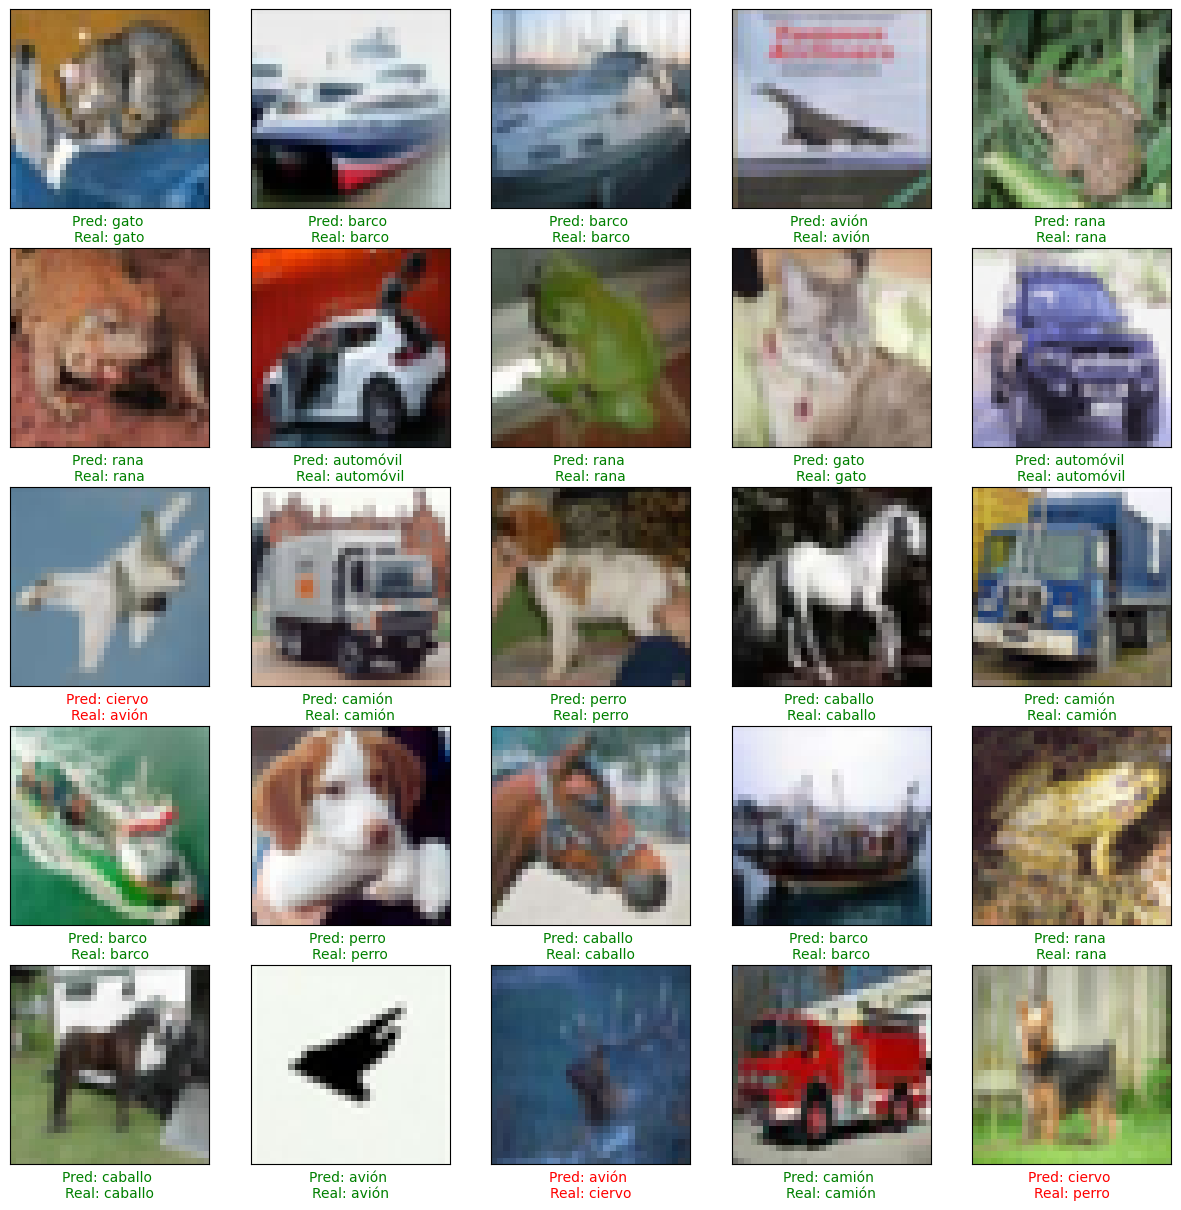

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Clases posibles en CIFAR-10
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Mostrar imágenes con etiquetas predichas y reales
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    # Calcular la etiqueta predicha y la etiqueta real
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]

    # Mostrar la etiqueta predicha y la etiqueta real
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("Pred: {} \nReal: {}".format(class_names[predicted_label],
                                            class_names[true_label]), color=color)

plt.show()

# Series temporales

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos desde Excel
df = pd.read_excel('dataframe_gastos.xlsx')
df

,Unnamed: 0,YearMonth,Category,Amount,Budget,UnderBudget,Seasonal
0,4897,2000-01,Utilities,804,150,0,1
1,4896,2000-01,Television,57,15,0,1
2,4895,2000-01,Shopping,255,100,0,1
3,4894,2000-01,Restaurants,663,150,0,1
4,4893,2000-01,Music,30,11,0,1
...,...,...,...,...,...,...,...
5486,10352,2024-01,Auto Insurance,315,75,0,1
5487,10351,2024-01,Alcohol & Bars,171,50,0,1
5488,10368,2024-01,Television,66,15,0,1
5489,10359,2024-01,Haircut,159,30,0,1


In [ ]:
# Cargar los datos desde Excel
df = df.drop(df.columns[0], axis=1)

# Convertir 'YearMonth' a tipo fecha y establecer como índice
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')
df.set_index('YearMonth', inplace=True)

# Normalizar datos (min-max scaling)
df['Amount_Normalized'] = (
    df['Amount'] - df['Amount'].min()) / (df['Amount'].max() - df['Amount'].min())
df['Budget_Normalized'] = (
    df['Budget'] - df['Budget'].min()) / (df['Budget'].max() - df['Budget'].min())

In [ ]:
#  Definir el tamaño de la ventana de tiempo
tamaño_ventana = 19

# Crear ventanas de tiempo
def crear_ventanas(df, tamaño_ventana):
    X, y = [], []
    for i in range(len(df) - tamaño_ventana):
        X.append(df.iloc[i:i+tamaño_ventana][['Seasonal',
                 'Budget_Normalized', 'Amount_Normalized']].values)
        y.append(df.iloc[i+tamaño_ventana]['UnderBudget'])
    return np.array(X), np.array(y)

In [ ]:
# Aplicar la función para crear las ventanas de tiempo
X, y = crear_ventanas(df, tamaño_ventana)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
# Construir el modelo de red neuronal convolucional
num_caracteristicas = 3  # 'Seasonal', 'Budget_Normalized' y 'Amount_Normalized'

model = Sequential()

# RNN
model.add(LSTM(50, activation='relu', input_shape=(tamaño_ventana, num_caracteristicas)))  # 50 unidades en la capa LSTM
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# CNN
model.add(Conv1D(filters=64, kernel_size=2, activation='relu',
          input_shape=(tamaño_ventana, num_caracteristicas)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
historial = model.fit(X_train, y_train, epochs=10,
                      batch_size=32, validation_split=0.1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Exactitud del modelo: {accuracy:.2f}')
print(f'Pérdida del modelo: {loss:.2f}')

# Guardar el modelo
model.save('modelo_gastos.h5')

Epoch 1/10
124/124 [==============================] - 6s 34ms/step - loss: 0.6739 - accuracy: 0.5748 - val_loss: 0.6471 - val_accuracy: 0.6347
Epoch 2/10
124/124 [==============================] - 3s 25ms/step - loss: 0.6708 - accuracy: 0.5925 - val_loss: 0.6438 - val_accuracy: 0.6347
Epoch 3/10
124/124 [==============================] - 3s 24ms/step - loss: 0.6679 - accuracy: 0.5994 - val_loss: 0.6432 - val_accuracy: 0.6461
Epoch 4/10
124/124 [==============================] - 4s 30ms/step - loss: 0.6673 - accuracy: 0.5996 - val_loss: 0.6460 - val_accuracy: 0.6438
Epoch 5/10
124/124 [==============================] - 4s 28ms/step - loss: 0.6652 - accuracy: 0.6002 - val_loss: 0.6441 - val_accuracy: 0.6438
Epoch 6/10
124/124 [==============================] - 3s 27ms/step - loss: 0.6637 - accuracy: 0.6052 - val_loss: 0.6411 - val_accuracy: 0.6461
Epoch 7/10
124/124 [==============================] - 4s 28ms/step - loss: 0.6623 - accuracy: 0.6073 - val_loss: 0.6375 - val_accuracy: 0.6438

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


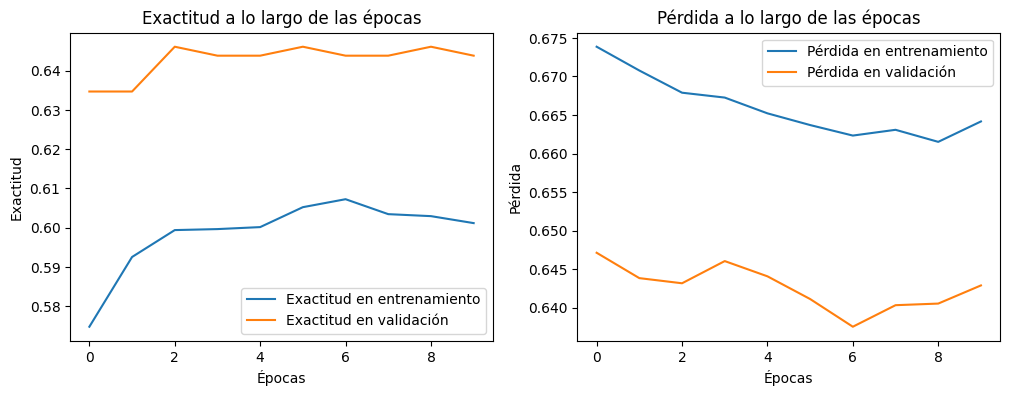

35/35 [==============================] - 1s 10ms/step


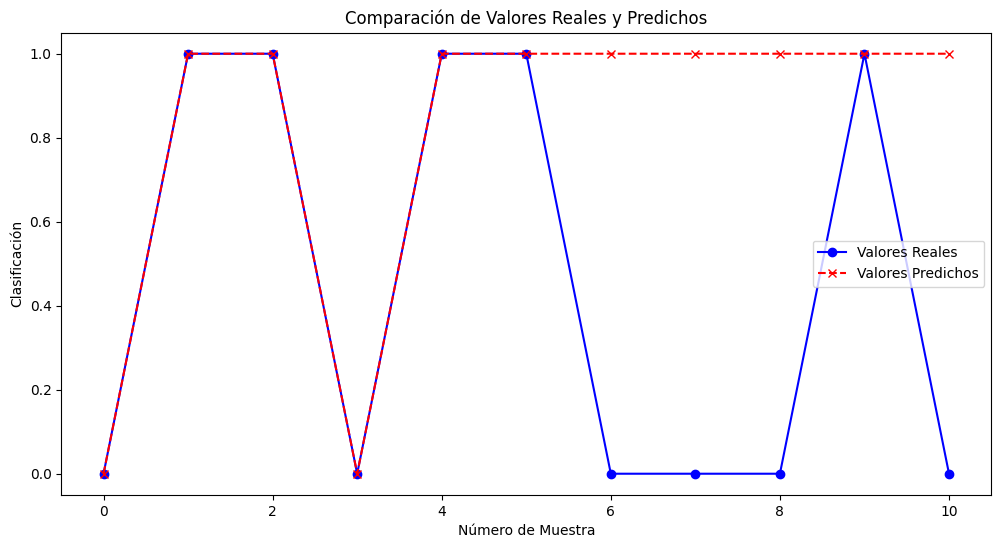

In [ ]:
# Gráfico de Exactitud
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Exactitud en entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Exactitud en validación')
plt.title('Exactitud a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

# Gráfico de Pérdida
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

y_pred = model.predict(X_test)

# Redondear las predicciones para obtener una clasificación binaria si tu salida es una probabilidad
y_pred_rounded = np.round(y_pred)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(y_test[:11], label='Valores Reales', color='blue', marker='o')
plt.plot(y_pred_rounded[:11], label='Valores Predichos',
         color='red', linestyle='--', marker='x')
plt.title('Comparación de Valores Reales y Predichos')
plt.xlabel('Número de Muestra')
plt.ylabel('Clasificación')
plt.legend()
plt.show()


In [ ]:
# Cargar el modelo entrenado desde el archivo
modelo_cargado = load_model('modelo_gastos.h5')

categoria_para_predecir = input(
    'Indique la categoría para obtener la probabilidad de exceso de gasto el mes que viene: ')

df_categoria = df.loc[df.Category == categoria_para_predecir]
df_categoria.sort_index(inplace=True)

X_categoria, _ = crear_ventanas(df_categoria[[
                                'Seasonal', 'Budget_Normalized', 'Amount_Normalized', 'UnderBudget']], tamaño_ventana)
X_categoria = X_categoria.reshape(
    X_categoria.shape[0], tamaño_ventana, num_caracteristicas)

# Hacer la predicción con el modelo cargado
prediccion = modelo_cargado.predict(X_categoria)
probabilidad_exceder = prediccion[-1][0]
print(
    f'La probabilidad de que la categoría exceda el presupuesto el próximo mes es: {probabilidad_exceder:.4f}')

Indique la categoría para obtener la probabilidad de exceso de gasto el mes que viene: Utilities
9/9 [==============================] - 0s 7ms/step
La probabilidad de que la categoría exceda el presupuesto el próximo mes es: 0.4708


In [ ]:
# Tenemos mas accuracy en validación que en entrenamiento por el Dropout, porque en entrenamiento se van apagando pero en test se evalua con todo ON